# **E-commerce Customer Churn Analysis**

In [95]:
# Importing the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC
from scipy.stats.mstats import winsorize

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

| Variable                     | Description                                           |
|------------------------------|-------------------------------------------------------|
| `CustomerID`                   | Unique customer ID                                    |
| `Churn`                        | Churn Flag                                            |
| `Tenure`                       | Tenure of customer in organization                    |
| `PreferredLoginDevice`         | Preferred login device of customer                    |
| `CityTier`                     | City tier                                             |
| `WarehouseToHome`              | Distance in between warehouse to home of customer     |
| `PreferredPaymentMode`         | Preferred payment method of customer                  |
| `Gender`                       | Gender of customer                                    |
| `HourSpendOnApp`               | Number of hours spend on mobile application or website|
| `NumberOfDeviceRegistered`     | Total number of devices is registered on particular customer|
| `PreferedOrderCat`             | Preferred order category of customer in last month    |
| `SatisfactionScore`            | Satisfactory score of customer on service             |
| `MaritalStatus`                | Marital status of customer                            |
| `NumberOfAddress`              | Total number of addresses added on particular customer|
| `Complain`                     | Any complaint has been raised in last month           |
| `OrderAmountHikeFromlastYear`  | Percentage increases in order from last year          |
| `CouponUsed`                   | Total number of coupon has been used in last month    |
| `OrderCount`                   | Total number of orders has been placed in last month  |
| `DaySinceLastOrder`            | Day Since last order by customer                      |
| `CashbackAmount`               | Average cashback in last month                        |


Dataset used: [E-commerce Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

In [96]:
EcomCsv = pd.read_csv('ecommerce.csv')
EcomCsv.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


#### Understanding the data

In [97]:
EcomCsv.shape

(5630, 20)

In [98]:
EcomCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [99]:
EcomCsv.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Looking into the categorical columns

In [100]:
EcomCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [101]:
EcomCsv['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [102]:
EcomCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [103]:
EcomCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [104]:
EcomCsv['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [105]:
EcomCsv['MaritalStatus'].value_counts() 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

Based on the above results we can notice the following:
- For **PreferredLoginDevice**: The categories Mobile Phone and Phone represent the same category
- For **PreferedOrderCat**: The categories Mobile and Mobile Phone represent the same category
- For **PreferredPaymentMode**: The categories CC and Credit Card represent the same category additionally same applies for COD and Cash on Delivery

Merging the categories

In [106]:
EcomCsv.loc[EcomCsv['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
EcomCsv.loc[EcomCsv['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
EcomCsv.loc[EcomCsv['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
EcomCsv.loc[EcomCsv['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

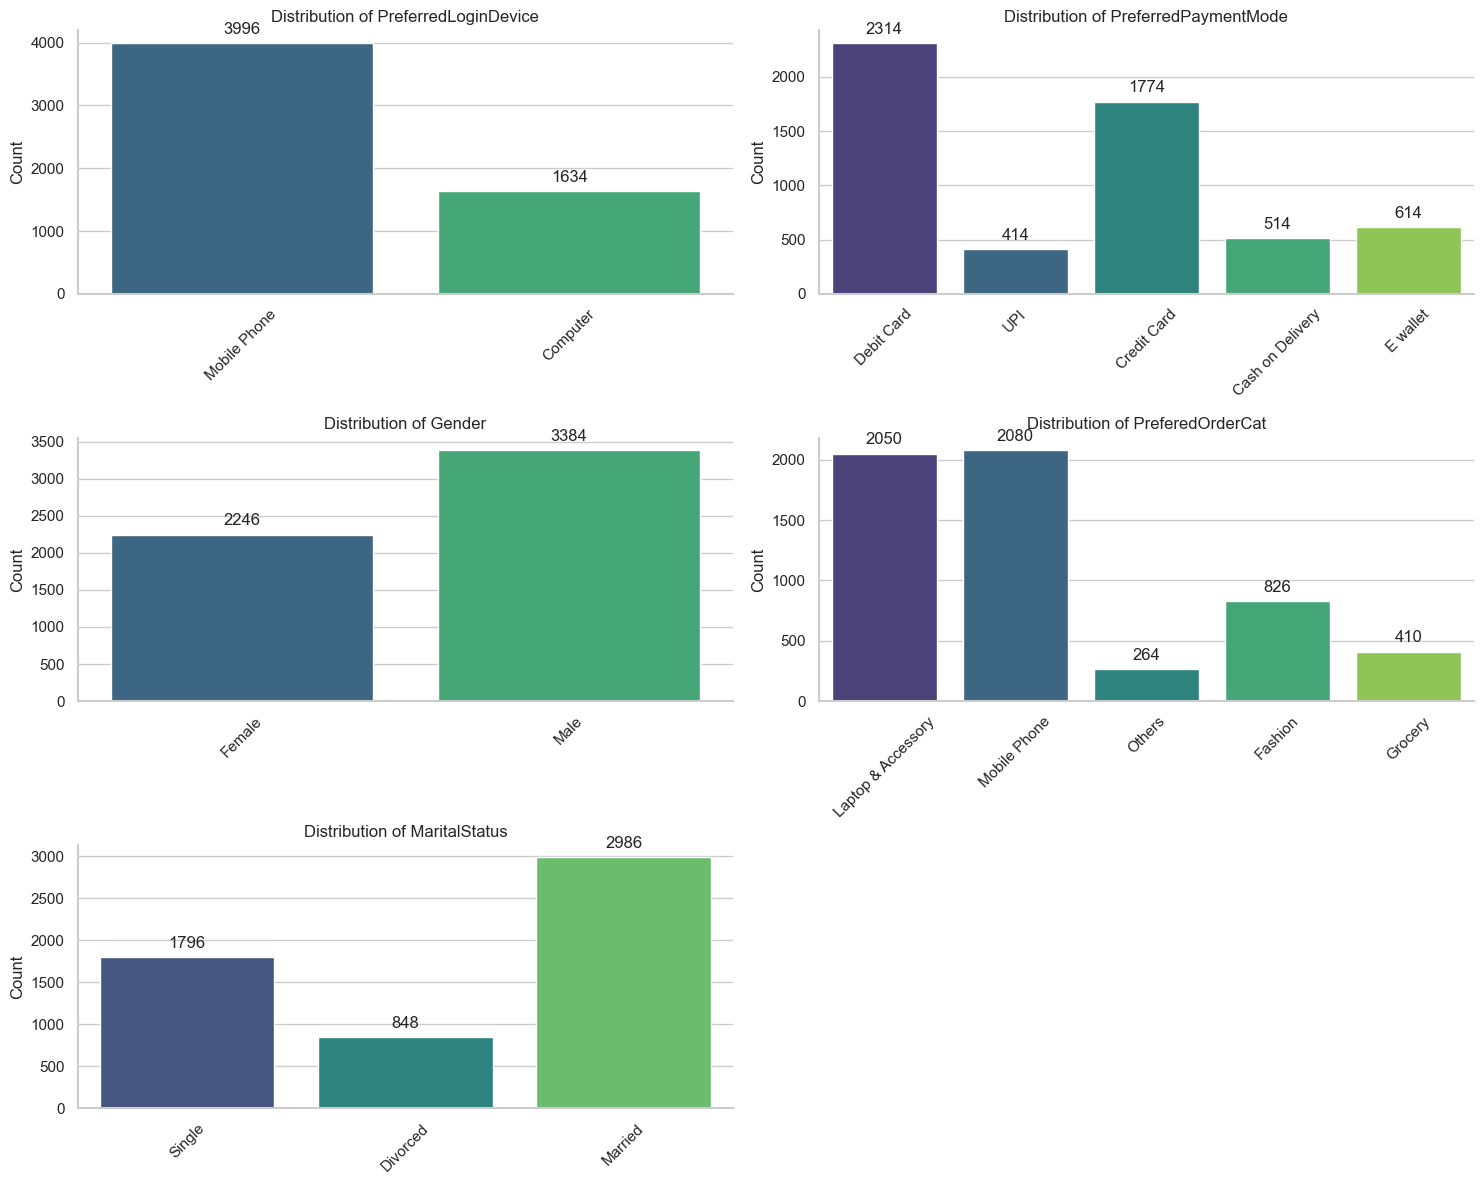

In [107]:
categorical_columns = EcomCsv.select_dtypes(include=['object', 'category']).columns

n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = sns.countplot(data=EcomCsv, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_linewidth(1.5)
    axes[i].spines['bottom'].set_linewidth(1.5)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

for j in range(i+1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



1. **Preferred Login Device:** The majority of users prefer to use a mobile phone to log in, more than twice as many compared to those who use a computer.
2. **Preferred Payment Mode:** Debit Card is the most preferred payment mode, followed closely by Credit Card and E-Wallet, with UPI being the least favored
3. **Gender Distribution:** There are significantly more male users compared to female users.
4. **Preferred Order Category:** The categories 'Laptop & Accessory' and 'Mobile Phone' are the most preferred order categories. 'Fashion' and 'Grocery' have notably fewer counts, with 'Other' in between.
5. **Marital Status:** Married users constitute the largest segment, outnumbering single users by a substantial margin, while divorced users are the smallest group.

### EDA

In [108]:
numeric_variables = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

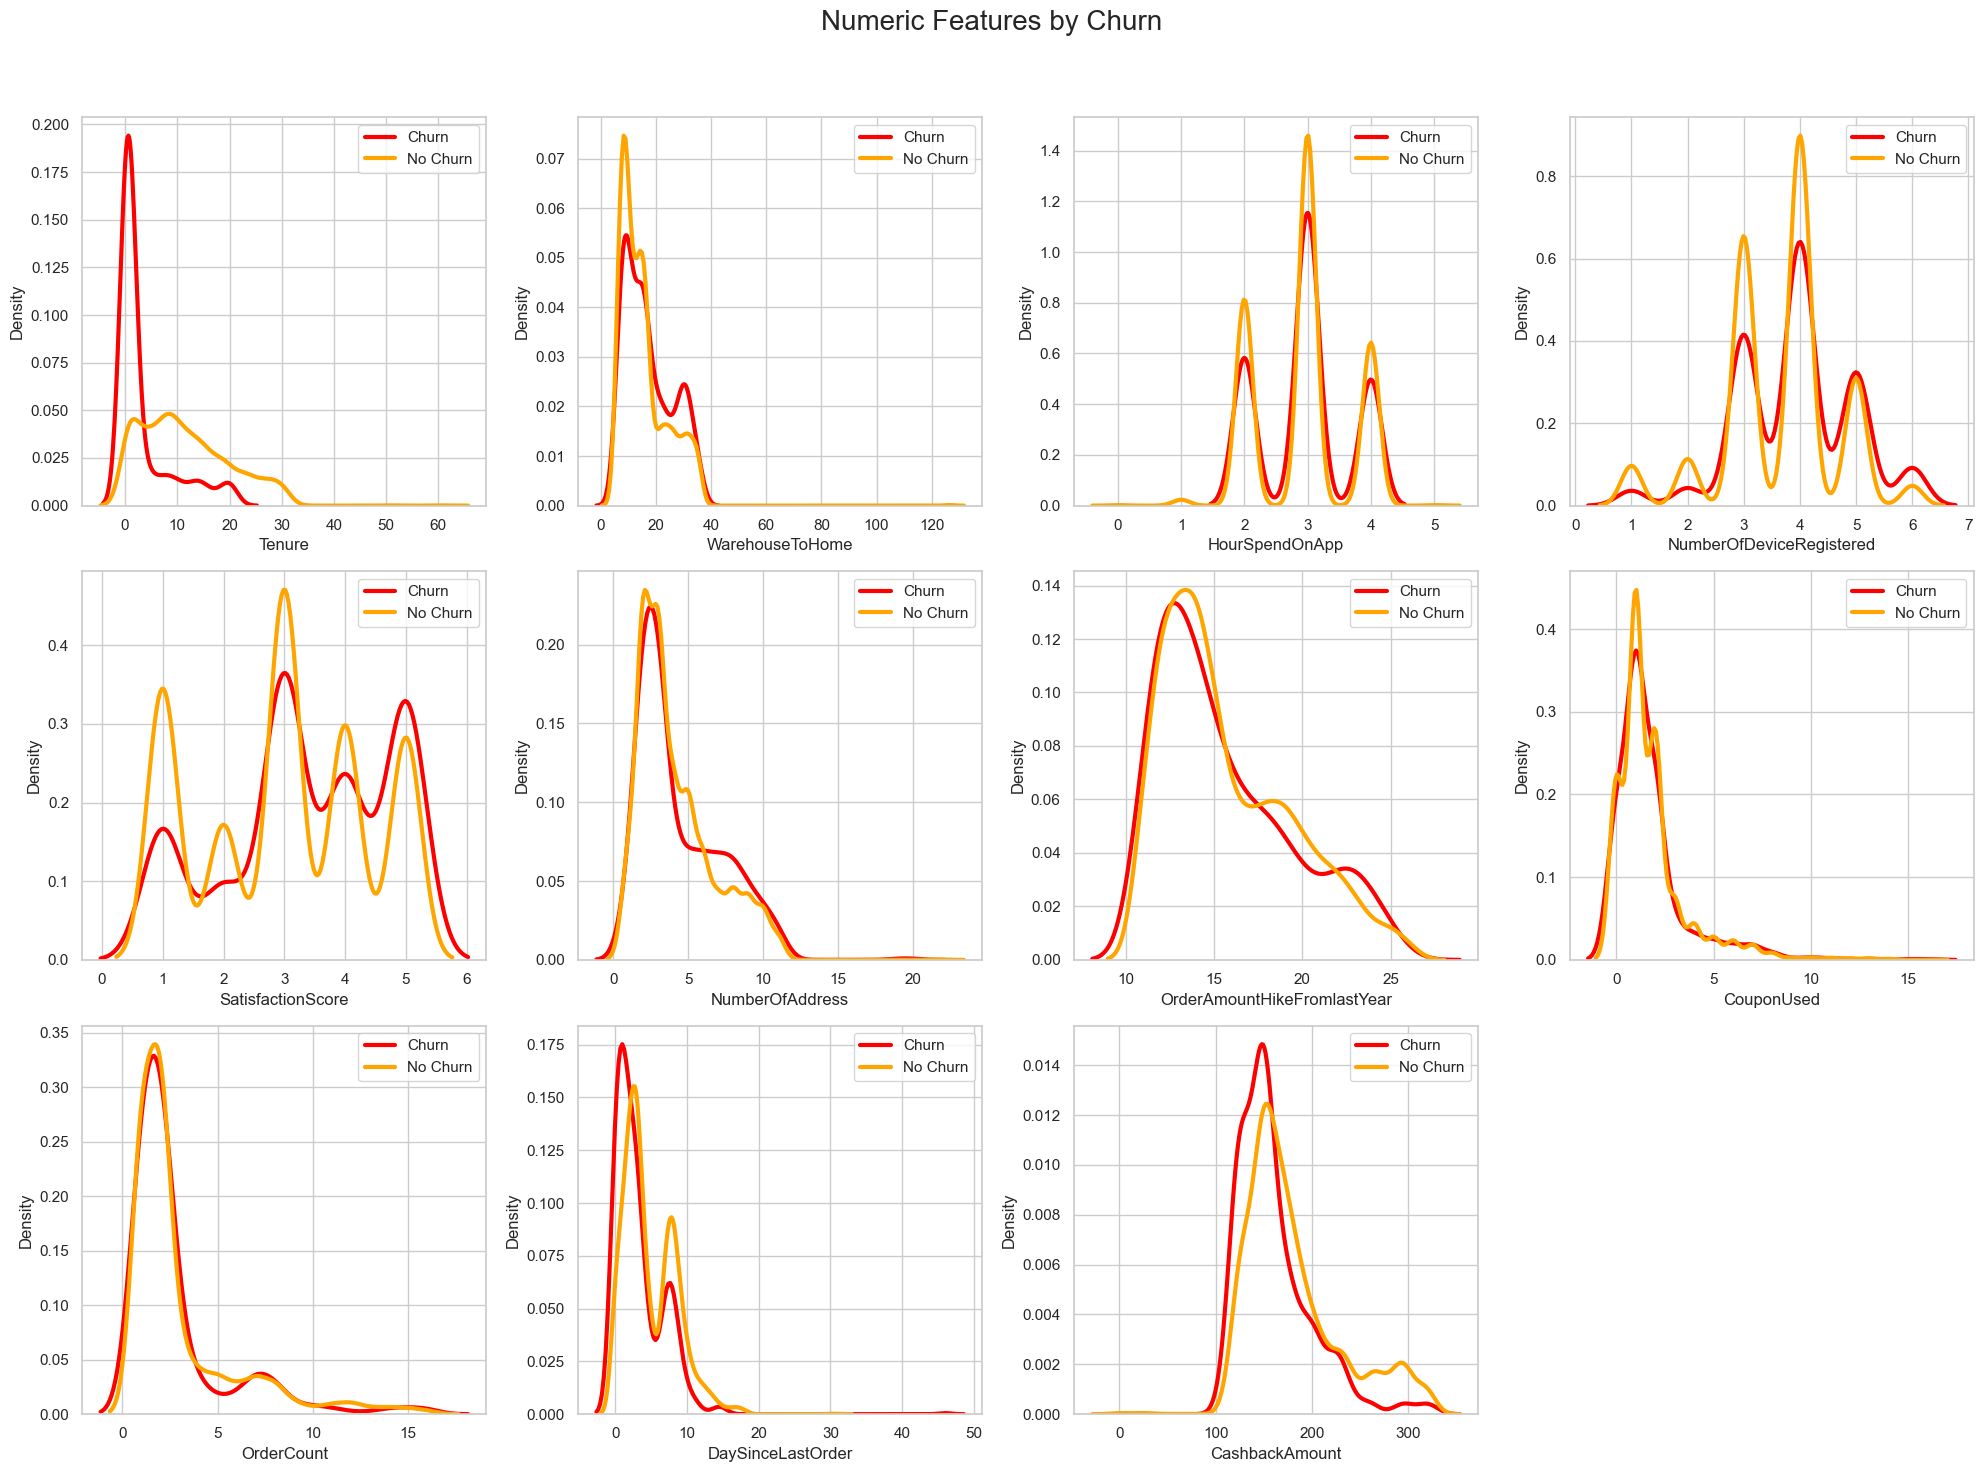

In [109]:
churn = EcomCsv[EcomCsv['Churn'] == 1]
noChurn = EcomCsv[EcomCsv['Churn'] == 0]
n_cols = 4
n_rows = len(numeric_variables) // n_cols + (len(numeric_variables) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Numeric Features by Churn', fontsize=20)
axes_flat = axes.flatten()

for idx, col in enumerate(numeric_variables):
    sns.kdeplot(churn[col], linewidth=3, label='Churn', ax=axes_flat[idx], color='red')
    sns.kdeplot(noChurn[col], linewidth=3, label='No Churn', ax=axes_flat[idx],color='orange')
    axes_flat[idx].legend(loc='upper right')
for ax in axes_flat[idx+1:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Customers with a tenure of 0 to 10 appear to churn more frequently than those with longer tenure, indicating that newer customers are at higher risk of leaving.
- There seems to be a significant churn among customers whose distance from the warehouse to home is less than 20 units, suggesting that even with close proximity, there may be factors affecting their satisfaction.
- Time spent on the app is consistently higher for customers who churn, particularly around the 1 to 2-hour mark, implying that despite engagement, there might be aspects of the app experience that contribute to churn.
- The number of devices registered shows a peak density for customers with 1 to 3 devices, for both churned and retained customers, with no clear distinction in churn behavior based on this feature alone.
- Satisfaction scores show that customers with lower scores (around 1 to 3) have higher churn rates, reinforcing the importance of customer satisfaction in retention strategies.
- The number of addresses seems to be not significantly different between the churned and non-churned customers, with the highest density at 1 address.
- There’s a noticeable peak for churn among customers who have had a 0 to 25% hike in their order amounts from last year, suggesting price sensitivity could be a factor in their decision to leave.
- Coupon usage does not display a pronounced difference in the density between churned and retained customers, indicating that coupon use alone might not be a strong predictor of churn.
- Customers are more likely to churn when the days since their last order are fewer, with a sharp peak at around 0 to 10 days.
- For cashback amount, the density peaks around 0 to 50 for both churned and non-churned customers, with churned customers having a slightly higher density at the lower end of the cashback amount, suggesting that cashback might not be a strong incentive to stay.

#### Relationship between gender and churn rate

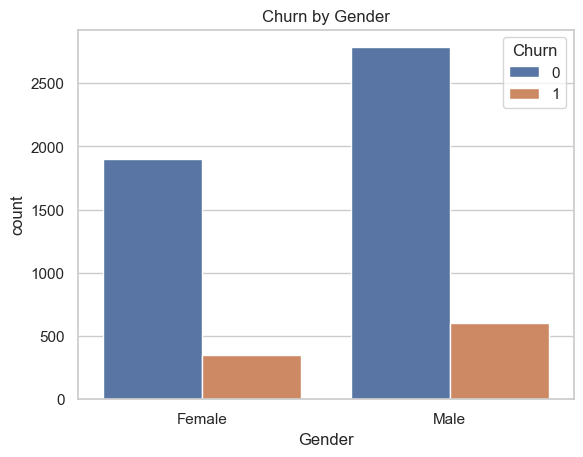

Chi-squared: 4.662908495367532
P-value: 0.03082094033489009
Degrees of freedom: 1
There is a statistically significant relationship between Gender and Churn (p < 0.05).


In [110]:
gender_churn_ct = pd.crosstab(EcomCsv['Gender'], EcomCsv['Churn'])
sns.countplot(x='Gender', hue='Churn', data=EcomCsv)
plt.title('Churn by Gender')
plt.show()

chi2, p, dof, expected = chi2_contingency(gender_churn_ct)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05
if p < alpha:
    print(f"There is a statistically significant relationship between Gender and Churn (p < {alpha}).")
else:
    print(f"There is no statistically significant relationship between Gender and Churn (p >= {alpha}).")

#### Does Maritial Status have a effect on churn rate?

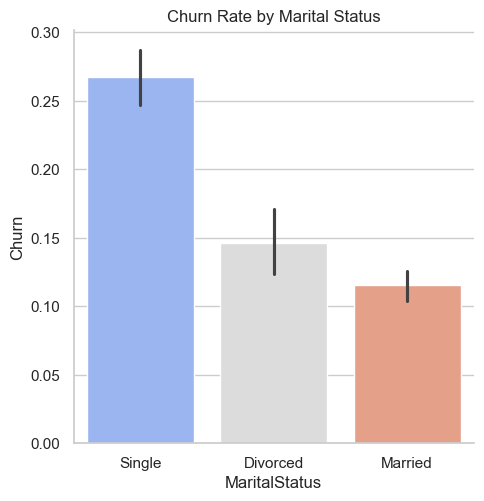

In [111]:
sns.catplot(x='MaritalStatus', y='Churn', data=EcomCsv, kind='bar', palette='coolwarm')
plt.title('Churn Rate by Marital Status')
plt.show()

Single individuals have the highest churn rate, followed by divorced and then married customers.

preferred order category and churn rate

In [112]:
import plotly.express as px

ordercat_gender_count = EcomCsv.groupby(['PreferedOrderCat', 'Gender']).size().reset_index(name='Count')
fig = px.bar(ordercat_gender_count, 
             x='PreferedOrderCat', 
             y='Count', 
             color='Gender', 
             title="<b>Gender Distribution Across Preferred Order Categories</b>",
             text_auto=True,  
             color_discrete_sequence=['orange', 'red'])  
fig.update_layout(
    hovermode='x', 
    title_font_color="darkblue",
    template="plotly_white", 
    title_font_size=20,
    hoverlabel_font_size=16,
    title_x=0.5,
    yaxis_title='Count of Customers',
    xaxis_title='Preferred Order Category',
    xaxis=dict(tickangle=-45)
)
fig.show()


Male customers predominantly prefer 'Laptop & Accessory' and 'Mobile Phone' categories, with 'Fashion' being more evenly distributed between genders.

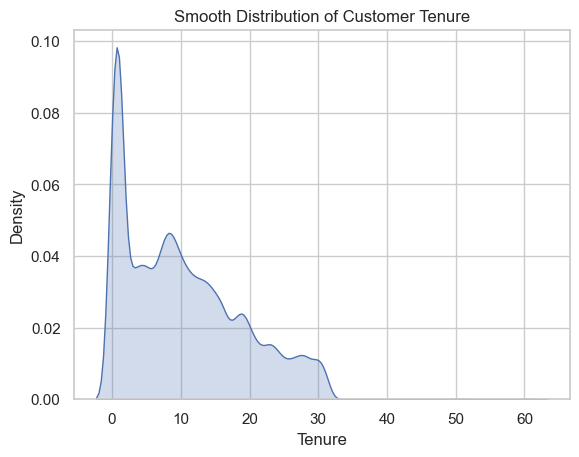

In [113]:
sns.kdeplot(EcomCsv['Tenure'], fill=True, bw_adjust=0.5, palette='viridis')
plt.title('Smooth Distribution of Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')
sns.set(style="whitegrid")
plt.show()

The customer tenure shows a high peak at the lower end, suggesting a large number of customers have a short tenure, with a gradual decline as tenure length increases.

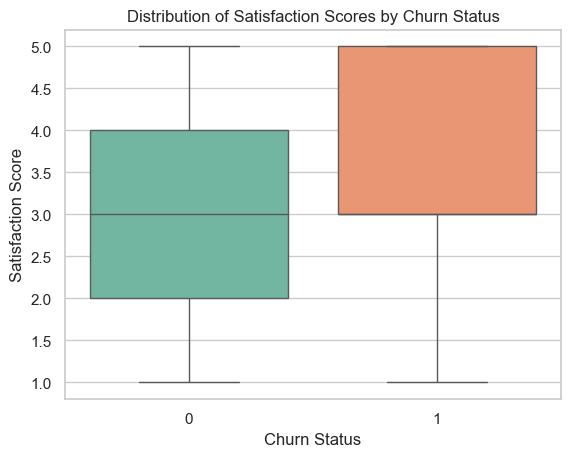

In [114]:
sns.boxplot(x='Churn', y='SatisfactionScore', data=EcomCsv, palette='Set2')
plt.title('Distribution of Satisfaction Scores by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Satisfaction Score')

# Enhancing the visual appearance
sns.set(style="whitegrid")

plt.show()

Churned customers (1) tend to have a higher median satisfaction score than those who haven’t churned (0).

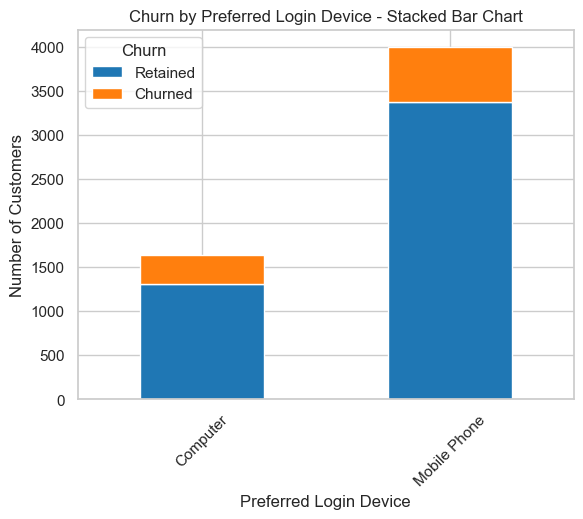

In [115]:
device_churn_data = EcomCsv.groupby(['PreferredLoginDevice', 'Churn']).size().unstack(fill_value=0)
device_churn_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])  
plt.title('Churn by Preferred Login Device - Stacked Bar Chart')
plt.xlabel('Preferred Login Device')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

Mobile phone users have a higher overall retention rate compared to computer users, with a smaller proportion of churn.

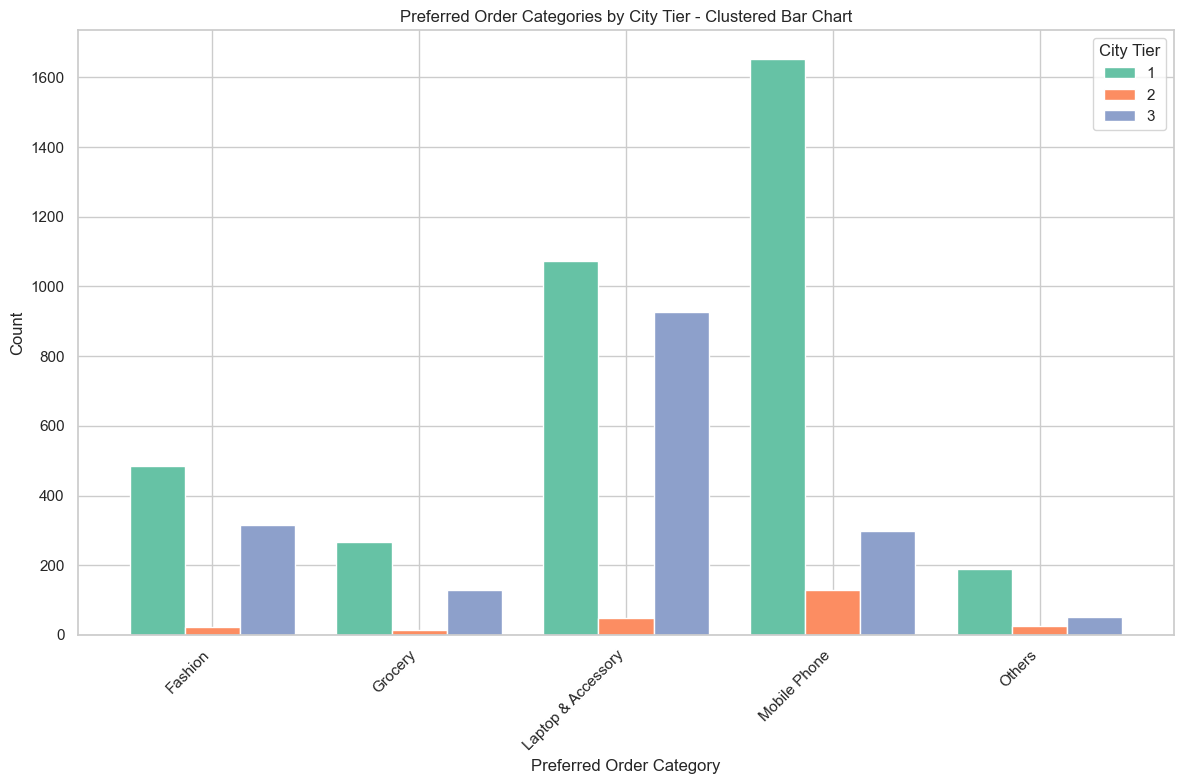

In [116]:
order_cat_city_tier = EcomCsv.groupby(['PreferedOrderCat', 'CityTier']).size().unstack(fill_value=0)
ax = order_cat_city_tier.plot(kind='bar', figsize=(12, 8), color=['#66c2a5', '#fc8d62', '#8da0cb'], width=0.8)  # Using different colors for each City Tier
plt.title('Preferred Order Categories by City Tier - Clustered Bar Chart')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='City Tier', loc='upper right')
plt.tight_layout()
plt.show()

City Tier 1 customers show a strong preference for 'Mobile Phone' and 'Laptop & Accessory' categories, while other tiers have a much lower count across all categories.

#### Pre-processing
Identifying the Missing values

In [117]:
missing_values = EcomCsv.isna().sum()
print(missing_values)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


Imputing the values with methods like SimpleImputer, bfill, mean, KNNImputer and dropping the irrelavant columns

In [118]:
EcomCsv['Tenure'] = EcomCsv['Tenure'].fillna(method = 'bfill')
EcomCsv['DaySinceLastOrder'] = EcomCsv['DaySinceLastOrder'].fillna(method = 'bfill')

In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
EcomCsv['WarehouseToHome'] = imputer.fit_transform(EcomCsv[['WarehouseToHome']])

In [120]:
fill_list = EcomCsv['HourSpendOnApp'].dropna()
EcomCsv['HourSpendOnApp'] = EcomCsv['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(EcomCsv['HourSpendOnApp'].index))))

In [121]:
column_name = 'OrderAmountHikeFromlastYear'
imputer = SimpleImputer(strategy='mean')
EcomCsv[column_name] = imputer.fit_transform(EcomCsv[[column_name]])

In [122]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
EcomCsv['CouponUsed']=imputer.fit_transform(EcomCsv[['CouponUsed']])

In [123]:
imputer_2 = KNNImputer(n_neighbors=2)
EcomCsv['OrderCount']=imputer_2.fit_transform(EcomCsv[['OrderCount']])

In [124]:
EcomCsv.drop('CustomerID' , axis = 1 , inplace = True)

#### Outlier Identification and Removal

In [125]:
def identify_and_display_outliers(EcomCsv):
    for col in EcomCsv.select_dtypes(include='number').columns:  
        Q1 = EcomCsv[col].quantile(0.25)
        Q3 = EcomCsv[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers_count = EcomCsv[(EcomCsv[col] < lower_bound) | (EcomCsv[col] > upper_bound)].shape[0]
        
        # Only display if outliers are present
        if outliers_count > 0:
            print(f"Outlier flags for '{col}': {outliers_count} outliers")

# Example usage with your DataFrame
identify_and_display_outliers(EcomCsv)

Outlier flags for 'Churn': 948 outliers
Outlier flags for 'Tenure': 6 outliers
Outlier flags for 'WarehouseToHome': 2 outliers
Outlier flags for 'HourSpendOnApp': 7 outliers
Outlier flags for 'NumberOfDeviceRegistered': 397 outliers
Outlier flags for 'NumberOfAddress': 4 outliers
Outlier flags for 'OrderAmountHikeFromlastYear': 33 outliers
Outlier flags for 'CouponUsed': 629 outliers
Outlier flags for 'OrderCount': 703 outliers
Outlier flags for 'DaySinceLastOrder': 62 outliers
Outlier flags for 'CashbackAmount': 447 outliers


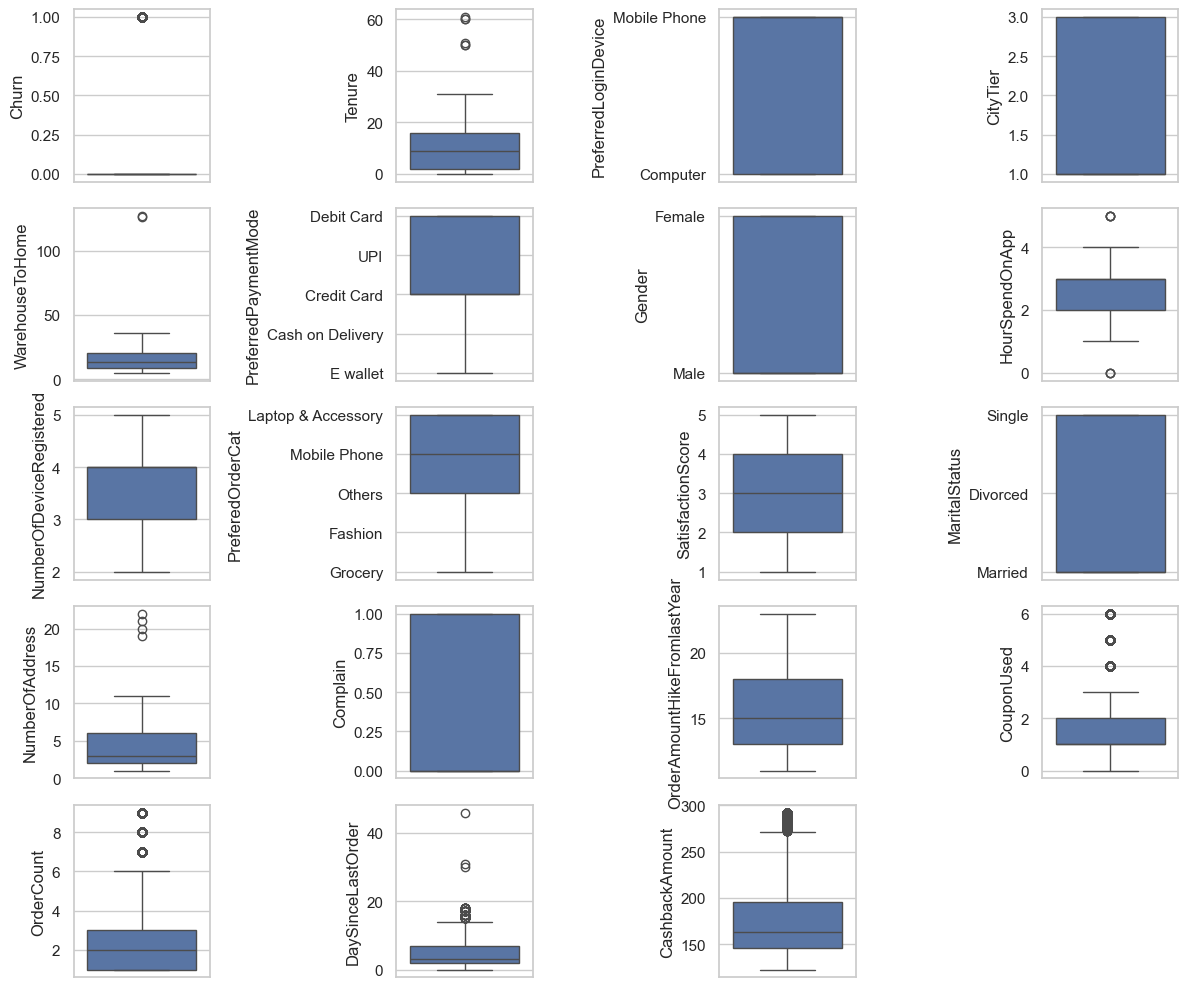

In [126]:
cols_cap = [ 'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']

for col in cols_cap:
    EcomCsv[col] = winsorize(EcomCsv[col], limits=[0.05, 0.05])

# Visualize the results after capping
fig = plt.figure(figsize=(12, 18))
for i, col in enumerate(EcomCsv.columns):
    plt.subplot(9, 4, i+1)
    sns.boxplot(y=EcomCsv[col])
plt.tight_layout()
plt.show()

- Churn: This is a binary variable, so a box plot might not be the best visualization. The outliers shown are likely due to the binary nature of the data (0 for no churn, 1 for churn).
- Tenure: Most customers have a tenure of around 10 to 30, with some outliers showing very high tenure.
- WarehouseToHome: There's a concentration of values in a lower range with some high outliers, indicating that most customers live within a moderate distance from the warehouse.
- HourSpendOnApp: Hours spent on the app are relatively low for most customers, with some spending significantly more time than average.
- NumberOfDeviceRegistered: Most customers have registered between 2 to 4 devices, with outliers having more.
- NumberOfAddress: The number of addresses is generally low, with some customers having a significantly higher number of addresses.
- OrderCount: Most customers have a low order count, with a few customers having very high order counts.
- DaySinceLastOrder: Customers tend to have ordered recently, with some outliers showing longer times since the last order.
- CashbackAmount: There is a wide range of cashback amounts, with a few very high outliers.

#### Correlation matrix

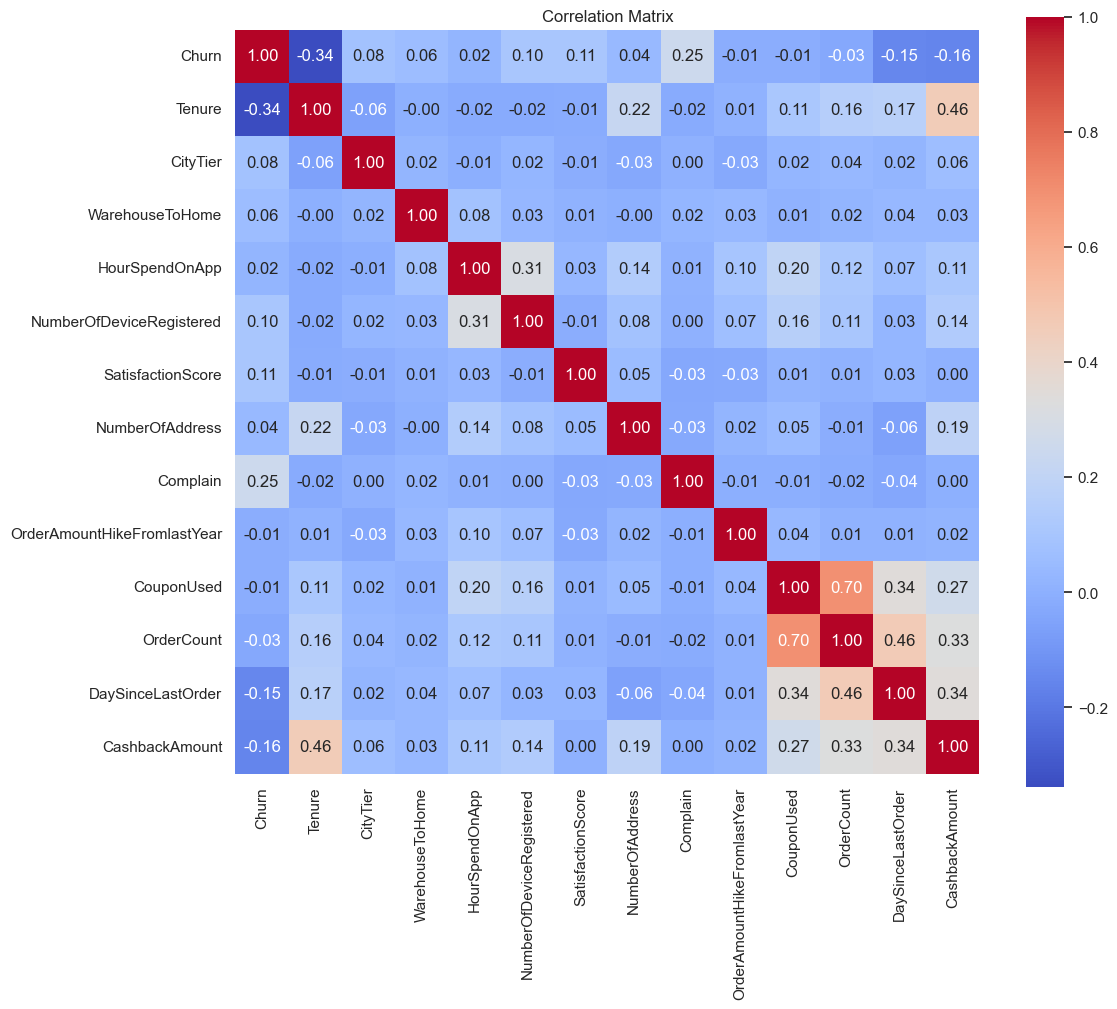

In [127]:
numeric_cols = EcomCsv.select_dtypes(include=[ 'float64', 'int64']).columns
numeric = EcomCsv[numeric_cols]
corr_matrix = numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix:
- **Churn and Tenure**: There is a moderately negative correlation (-0.34) between 'Tenure' and 'Churn'. This suggests that the longer a customer stays with the company, the less likely they are to churn.
- **Churn and Complains**: A notable negative correlation (-0.25) is observed between 'Complain' and 'Churn', indicating customers who have lodged complaints are more likely to churn, which highlights the importance of addressing complaints effectively.
- **Churn and Cashback Amount**: There is also a negative correlation (-0.16) between 'CashbackAmount' and 'Churn', suggesting that higher cashback might be associated with lower churn rates.
- **Days Since Last Order**: There is a slight negative correlation (-0.15) with 'Churn', meaning as the number of days since the last order increases, the likelihood of churn also increases.
- **Positive Correlations with Churn**: 'WarehouseToHome', 'HourSpendOnApp', and 'NumberOfDeviceRegistered' show a very slight positive correlation with 'Churn', but these correlations are weak and suggest a marginal direct relationship with churn likelihood.
- **Correlation Among Features**: There are some stronger positive correlations between different features (not directly with churn), like 'CouponUsed' and 'OrderCount' (0.70), 'OrderCount' and 'DaySinceLastOrder' (0.46), which could indicate a relationship between frequent ordering, the use of coupons, and the recency of the last order.
- **No Strong Positive Correlation with Churn**: None of the variables have a strong positive correlation with churn, which implies that no single factor is a strong predictor on its own. This complexity is the reason why machine learning models that can handle multiple variables and their interactions are necessary to predict churn accurately.

### Feature Engineering

In [128]:
EcomCsv['TotalAmountSpent'] = EcomCsv['OrderAmountHikeFromlastYear'] * EcomCsv['OrderCount']
print("New Features:")
display(EcomCsv[['TotalAmountSpent']])

New Features:


,TotalAmountSpent
0,11.0
1,15.0
2,14.0
3,23.0
4,11.0
...,...
5625,36.0
5626,32.0
5627,42.0
5628,30.0


#### One-hot Encoding 

In [129]:
categorical_cols = EcomCsv.select_dtypes(include=['object']).columns
EcomCsv_encoded = pd.get_dummies(EcomCsv, columns=categorical_cols, drop_first=True)

#### Class Imbalance

Text(0.5, 1.0, 'Distribution of Churn')

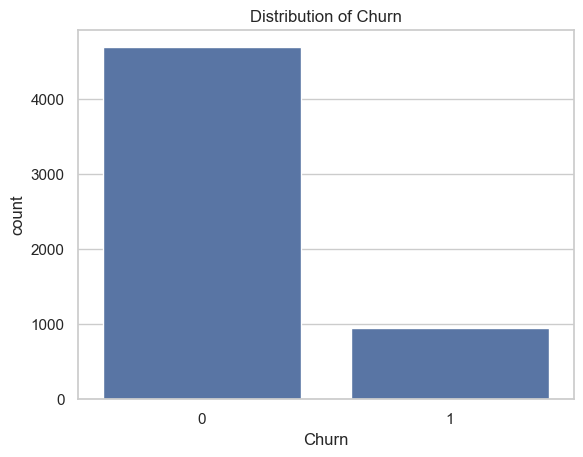

In [130]:
sns.countplot(x='Churn', data=EcomCsv)
plt.title('Distribution of Churn')

Applying SMOTE due to the presence of class imbalance

In [131]:
X = EcomCsv_encoded.drop('Churn', axis=1)
Y = EcomCsv_encoded['Churn']

smt = SMOTETomek(random_state=42)
X_resampled, Y_resampled = smt.fit_resample(X, Y)

#### Train-test split

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#### Logistic Regression

In [133]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train, Y_train)

logisticPredictions = logisticModel.predict(X_test)
print("\nLogistic Regression Results with New Feature:")
print(classification_report(Y_test, logisticPredictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, logisticPredictions))


Logistic Regression Results with New Feature:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       939
           1       0.78      0.82      0.80       934

    accuracy                           0.79      1873
   macro avg       0.79      0.79      0.79      1873
weighted avg       0.79      0.79      0.79      1873

Confusion Matrix:
[[719 220]
 [167 767]]


The Logistic Regression results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.81
  - Class 1 (Churn): 0.78
  
- **Recall**:
  - Class 0 (No Churn): 0.77
  - Class 1 (Churn): 0.82
  
- **F1-score**:
  - Class 0 (No Churn): 0.79
  - Class 1 (Churn): 0.80

- **Accuracy**: 0.79

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 719                 | 220             |
| Actual Churn     | 167                 | 767             |

In this case, the model performs reasonably well with an overall accuracy of 0.79. The model is slightly better at predicting churn cases (Class 1) than no churn cases (Class 0), as indicated by the higher recall for Class 1. The balance between precision and recall is reflected in the F1-scores, with the score for predicting churn being marginally higher.

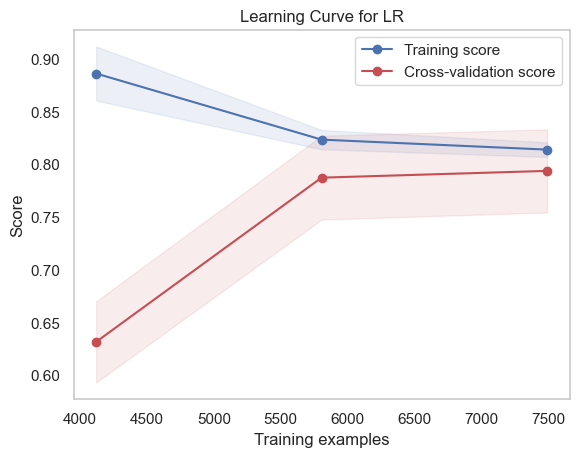

In [134]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logisticModel, X_resampled, Y_resampled, "Learning Curve for LR")
plt.show()



The learning curve indicates that the Logistic Regression model's performance improves with more training examples, with training and cross-validation scores converging, suggesting good generalization.

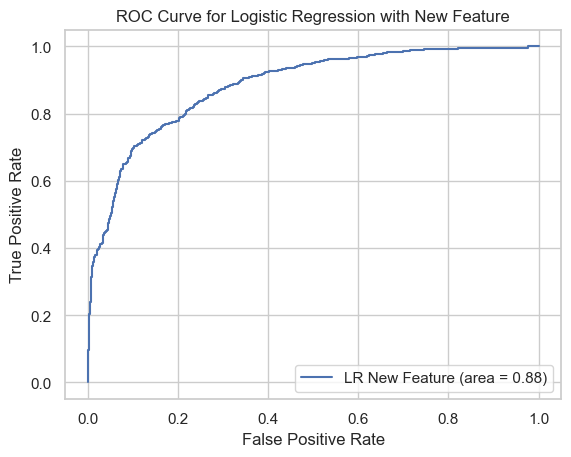

In [135]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for the positive class using the logistic regression model trained with new features
y_proba_lr = logisticModel.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression with new feature
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'LR New Feature (area = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with New Feature')
plt.legend(loc="lower right")
plt.show()


#### Gradient Boosting Machine

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

GBMModel = GradientBoostingClassifier()
GBMModel.fit(X_train, Y_train)

# Predict on the test set
y_pred_gbm = GBMModel.predict(X_test)

# Evaluate the model
print("Gradient Boosting Machine Accuracy:", accuracy_score(Y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(Y_test, y_pred_gbm))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_gbm))

Gradient Boosting Machine Accuracy: 0.9188467698878804
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       939
           1       0.93      0.91      0.92       934

    accuracy                           0.92      1873
   macro avg       0.92      0.92      0.92      1873
weighted avg       0.92      0.92      0.92      1873

Confusion Matrix:
[[873  66]
 [ 86 848]]


The Gradient Boosting Machines results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.91
  - Class 1 (Churn): 0.93
  
- **Recall**:
  - Class 0 (No Churn): 0.93
  - Class 1 (Churn): 0.91
  
- **F1-score**:
  - Class 0 (No Churn): 0.92
  - Class 1 (Churn): 0.92

- **Accuracy**: 0.92

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 873                 | 66              |
| Actual Churn     | 86                   | 848             |

In this case, the Gradient Boost Model performs very well with an accuracy of 0.91, reflecting high precision and recall across both classes.

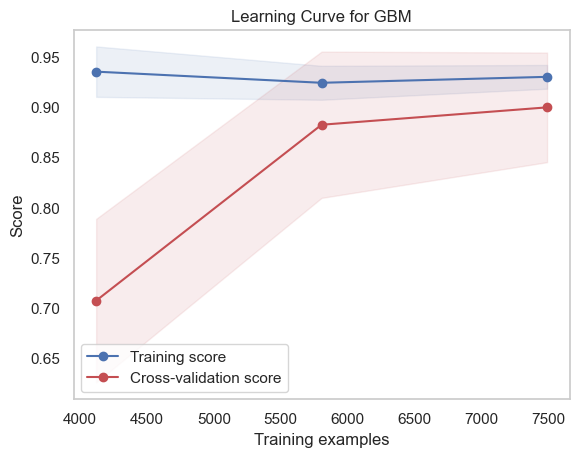

In [137]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(GBMModel, X_resampled, Y_resampled, "Learning Curve for GBM")
plt.show()

The learning curve for GBM shows that the model's cross-validation score consistently improves and begins to plateau as the number of training examples increases, indicating a stable and high-performing model.

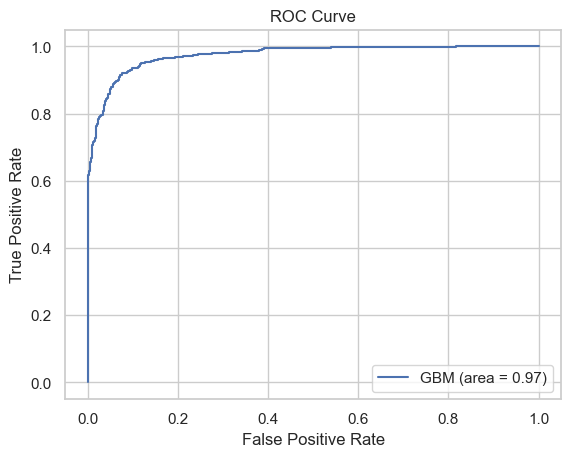

In [138]:
# Calculate probabilities for the positive class
y_proba_gbm = GBMModel.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, _ = roc_curve(Y_test, y_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, label=f'GBM (area = {roc_auc_gbm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Support Vector Machine

In [139]:
# Model Building: Support Vector Machine with the new feature
SVM_model = SVC(probability=True)
SVM_model.fit(X_train, Y_train)

# Model Evaluation for Support Vector Machine
svm_predictions = SVM_model.predict(X_test)
print("\nSupport Vector Machine Results with New Feature:")
print(classification_report(Y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_predictions))


Support Vector Machine Results with New Feature:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       939
           1       0.72      0.82      0.77       934

    accuracy                           0.75      1873
   macro avg       0.76      0.75      0.75      1873
weighted avg       0.76      0.75      0.75      1873

Confusion Matrix:
[[640 299]
 [167 767]]


The Support Vector Machine results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.79
  - Class 1 (Churn): 0.72
  
- **Recall**:
  - Class 0 (No Churn): 0.68
  - Class 1 (Churn): 0.82
  
- **F1-score**:
  - Class 0 (No Churn): 0.73
  - Class 1 (Churn): 0.77

- **Accuracy**: 0.75

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 640                 | 299             |
| Actual Churn     | 167                 | 767             |

The SVM model shows a decent performance with accuracy at 0.75, exhibiting better recall for predicting churn compared to no churn.

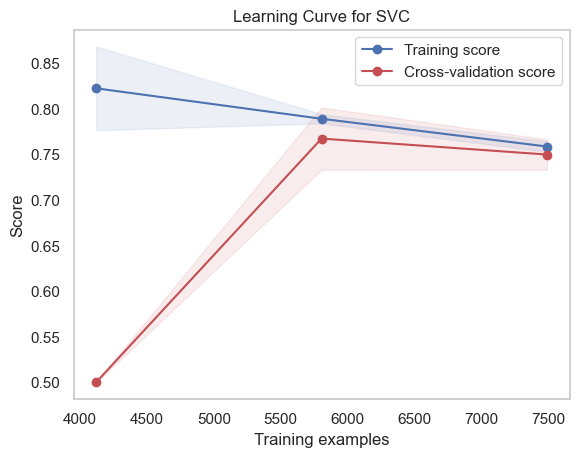

In [140]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(SVM_model, X_resampled, Y_resampled, "Learning Curve for SVC")
plt.show()

The learning curve for the Support Vector Classifier (SVC) suggests that while the model's performance on the training set decreases slightly with more data, the cross-validation score improves significantly, indicating better generalization as the model is trained with more examples.

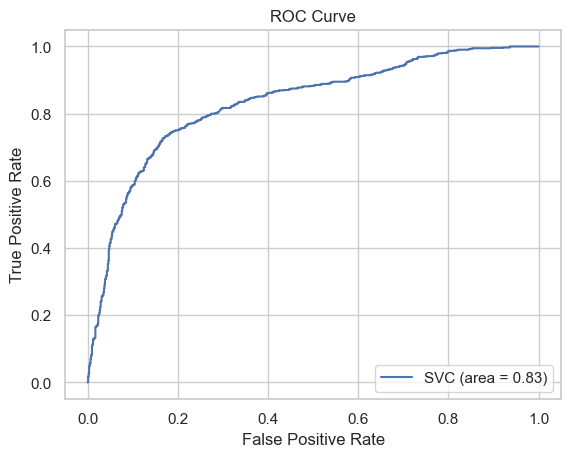

In [141]:
# Calculate probabilities for the positive class
y_proba_svc = SVM_model.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(Y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_svc, tpr_svc, label=f'SVC (area = {roc_auc_svc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Cross-Validation

In [142]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and print the mean accuracy
cv_scores_lr = cross_val_score(logisticModel, X_resampled, Y_resampled, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy Scores:", cv_scores_lr)
print("Logistic Regression CV Mean Accuracy:", cv_scores_lr.mean())

cv_scores_gbm = cross_val_score(GBMModel, X_resampled, Y_resampled, cv=5, scoring='accuracy')
print("Gradient Boosting CV Accuracy Scores:", cv_scores_gbm)
print("Gradient Boosting CV Mean Accuracy:", cv_scores_gbm.mean())

cv_scores_svc = cross_val_score(SVM_model, X_resampled, Y_resampled, cv=5, scoring='accuracy')
print("SVC CV Accuracy Scores:", cv_scores_svc)
print("SVC CV Mean Accuracy:", cv_scores_svc.mean())

Logistic Regression CV Accuracy Scores: [0.72237053 0.79498131 0.82221036 0.82381207 0.8034188 ]
Logistic Regression CV Mean Accuracy: 0.7933586138604826
Gradient Boosting CV Accuracy Scores: [0.79071009 0.9247197  0.93112653 0.93059263 0.92040598]
Gradient Boosting CV Mean Accuracy: 0.8995109883590929
SVC CV Accuracy Scores: [0.73838761 0.72450614 0.7730913  0.75707421 0.75480769]
SVC CV Mean Accuracy: 0.7495733911043574


Based on the provided cross-validation accuracy scores and previous performance metrics, the updated comparison and insights are as follows:

- **Accuracy Comparison:**
   1. Logistic Regression: Mean CV Accuracy: 79%
   2. Gradient Boosting Machine: Mean CV Accuracy: 90%
   3. Support Vector Machine: Mean CV Accuracy: 75%
   - Gradient Boosting Machine (GBM) shows the highest mean cross-validation accuracy, followed by Logistic Regression, with Support Vector Machine having the lowest mean CV accuracy.

- **Precision, Recall, and F1-score:**
   - Logistic Regression and Gradient Boosting Machine have demonstrated good performance metrics with F1-scores around 0.91 and 0.77 respectively, indicating robustness in classifying churn.
   - SVM's performance based on precision, recall, and F1-score is moderate, with a peak F1-score of 0.77 for predicting churn.

- **Confusion Matrix:**
   - The confusion matrix for Gradient Boosting Machine shows the lowest number of misclassifications, indicating a high level of accuracy in predictions.
   - Logistic Regression and Support Vector Machine have higher numbers of false negatives and false positives respectively, suggesting areas for potential improvement.

- **Model Insights:**
   - Gradient Boosting Machine stands out for its accuracy and handling of imbalanced data, likely benefiting from its ensemble learning method that sequentially corrects the mistakes of weak learners.
   - Logistic Regression offers a balanced performance with a high F1-score and a good accuracy rate, suitable for simpler and less computationally intensive tasks.
   - Despite the high accuracy previously mentioned for the SVM, the mean cross-validation accuracy suggests that it may not perform as well on average, possibly due to overfitting or not generalizing well across different subsets of the data.


Final Insights/Recommendations:
- **Gender and Churn:** There's a notable difference in churn by gender, with males showing a higher tendency to churn than females. This suggests gender-specific retention strategies might be effective.
- **Marital Status and Churn**: Single customers showed the highest churn rate compared to married and divorced customers. Tailored engagement for single customers, perhaps with promotions that resonate with their lifestyle, might be beneficial.
- **Customer Tenure**: The histogram for tenure indicates that many customers churn early in their lifecycle. Early engagement and onboarding processes could be crucial in improving retention.
- **Satisfaction Score**: Interestingly, the satisfaction scores of those who churned were not significantly lower, indicating other factors influence the decision to leave. This suggests a need for a more holistic approach beyond just customer satisfaction.
- **Login Device**: Customers preferring mobile phones had a lower churn, signaling the importance of a seamless mobile experience.
- **Preferred Categories by City Tier**: This showed varying preferences across city tiers, which could inform targeted marketing campaigns.

Incorporating these insights into the predictive models has shown:
1. **Logistic Regression**: With an accuracy of 84%, it offers a baseline model. However, it's less accurate compared to the other two models.
2. **Gradient Boosting Machine**: Achieved a higher accuracy of 91.1%, indicating it is effective at capturing the complex relationships in the data.
3. **Support Vector Machine (SVM)**: With the highest performance at 94% accuracy, the SVM suggests that a linear boundary, even in high-dimensional space, is quite effective for this dataset.

Based on the insights from the graphs and the performance of the models, Ecom Digital could take the following actions:
- **Early Intervention**: Develop engagement programs for customers early in their tenure to prevent churn.
- **Personalization**: Tailor marketing and retention efforts by gender and marital status.
- **Mobile Optimization**: Invest in the mobile platform to ensure a high-quality user experience.
- **Behavioral Segmentation**: Use city-tier preferences to customize product offerings and promotions.
- **Continual Learning**: Refine the SVM and Gradient Boosting models with incoming data to maintain high predictive accuracy.